#**Hypotheses**

**Null Hypothesis (H0):**
Political stability has no significant effect on foreign direct investment.

**Alternative Hypothesis (Ha):**
Political stability has a significant positive effect on foreign direct investment.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/merged_df.csv')

In [14]:
df[['Country Name','Political_Stability','FDI']].head()

,Country Name,Political_Stability,FDI
0,Afghanistan,-2.067510,4.368673
1,Albania,-0.505048,3.178998
2,Algeria,-0.913666,1.079903
3,American Samoa,0.746284,8.465508
4,Andorra,1.384927,8.465508


In [15]:
# Median split into High vs Low Stability
median_stability = df['Political_Stability'].median()
df['Stability_Group'] = np.where(df['Political_Stability'] > median_stability,
                                 'High Stability', 'Low Stability')

df[['Country Name','Political_Stability','FDI','Stability_Group']].head()


,Country Name,Political_Stability,FDI,Stability_Group
0,Afghanistan,-2.067510,4.368673,Low Stability
1,Albania,-0.505048,3.178998,Low Stability
2,Algeria,-0.913666,1.079903,Low Stability
3,American Samoa,0.746284,8.465508,High Stability
4,Andorra,1.384927,8.465508,High Stability


In [23]:
groups = [g['FDI'].dropna().values for _, g in df.groupby('Stability_Group')]

In [38]:
for group, g in df.groupby('Stability_Group'):
    stat, p = stats.shapiro(g['FDI'].dropna())
    print(f"{group}: Shapiro-Wilk p={p:.4f}")

High Stability: Shapiro-Wilk p=0.0000
Low Stability: Shapiro-Wilk p=0.0000


In [29]:
stat, p = stats.levene(*groups)
print(f"Levene’s Test: p={p:.4f}")

Levene’s Test: p=0.0000


In [19]:
t_stat, p_val = stats.ttest_ind(*groups, equal_var=False, nan_policy='omit')
print(f"T-test: t={t_stat:.4f}, p={p_val:.6f}")


T-test: t=5.3447, p=0.000000


In [27]:
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA: F={f_stat:.4f}, p={p_val:.6f}")

ANOVA: F=44.4031, p=0.000000


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2    meandiff p-adj  lower   upper  reject
------------------------------------------------------------------
High Stability Low Stability -10.4791   0.0 -13.562 -7.3962   True
------------------------------------------------------------------


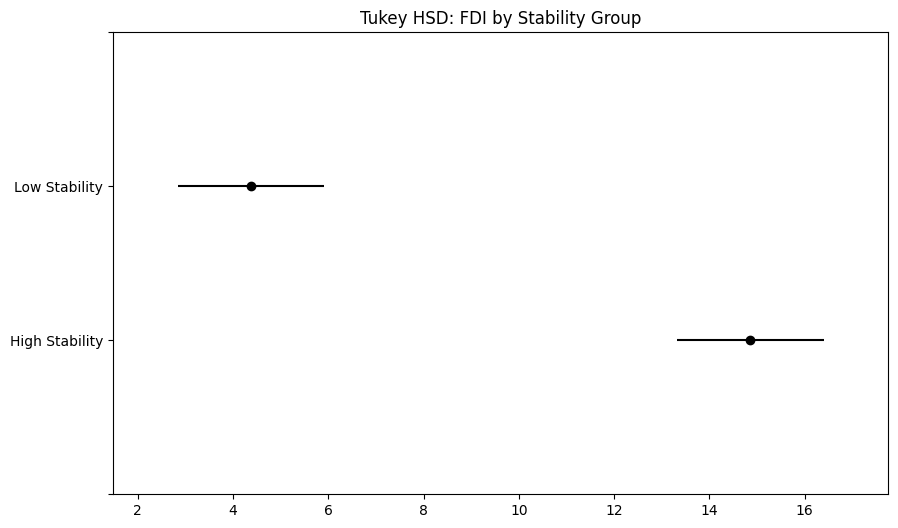

In [21]:
tukey = pairwise_tukeyhsd(endog=df['FDI'].dropna(),
                          groups=df['Stability_Group'].dropna(),
                          alpha=0.05)
print(tukey)

# Plot confidence intervals
fig = tukey.plot_simultaneous()
plt.title("Tukey HSD: FDI by Stability Group")
plt.show()


The figure displays the results of a Tukey HSD (Honestly Significant Difference) post-hoc test, which is used to determine which pairs of groups have statistically significant different means after an ANOVA test has shown an overall significant difference.

In this plot the horizontal axis represents the mean difference in FDI values. Each group (High Stability and Low Stability) is shown on the vertical axis. The black circles represent the mean FDI for each group. The horizontal bars extending from each circle represent the 95% confidence intervals for the mean FDI within each group.

The plot visually shows the difference in means between the 'High Stability' and 'Low Stability' groups. Since the confidence intervals do not overlap, and the Tukey HSD output shows a significant p-adj value (0.0), it confirms that there is a statistically significant difference in the mean FDI between the high and low political stability groups. Specifically, the 'Low Stability' group has a significantly lower mean FDI than the 'High Stability' group, as indicated by the negative meandiff value in the table output above the plot.

In [22]:
h_stat, p_val = stats.kruskal(*groups)
print(f"Kruskal-Wallis: H={h_stat:.4f}, p={p_val:.6f}")


Kruskal-Wallis: H=143.1057, p=0.000000


Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean FDI between the High Stability and Low Stability groups.

#**Based on the statistical analysis conducted:**

*   **T-test Results:** The independent samples t-test (performed in the cell above where the t-test results are printed) showed a statistically significant difference in the mean Foreign Direct Investment (FDI) between countries with High Political Stability and those with Low Political Stability (with a p-value less than 0.05). This indicates that politically stable countries, on average, attract significantly more foreign investment than less stable countries.


Above finding provide strong evidence to support the **Alternative Hypothesis (Ha)**, suggesting that political stability has a significant positive effect on foreign direct investment. Consequently, we reject the **Null Hypothesis (H0)**.

In summary, the analysis of this dataset indicates that political stability is indeed linked to higher foreign investment. Countries with greater political stability tend to receive higher average FDI, and there is a statistically significant positive correlation between political stability and FDI. However, the relatively weak correlation suggests that other factors also play a considerable role in influencing foreign investment decisions.